In [498]:
import pandas as pd
import numpy as np
from sklearn import cross_validation

## input data

In [499]:
titanic = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")
sample_submit = pd.read_csv("gender_submission.csv")

In [500]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data analysis

### Sex, Ticket, Embarked处理       FamilySize, NameLength, TicketLength添加

In [501]:
# titanic.describe()
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

titanic["SexNum"] = titanic["Sex"]
titanic.loc[titanic["Sex"] == "male", "SexNum"] = 0
titanic.loc[titanic["Sex"] == "female", "SexNum"] = 1

titanic["TicketLength"] = titanic["Ticket"].apply(lambda x: len(x))

titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,SexNum,TicketLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,23,0,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,51,1,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22,1,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1,44,1,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,24,0,6


In [502]:
# titanic_test.describe()
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())

titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].mean())

titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))

titanic_test["SexNum"] = titanic_test["Sex"]
titanic_test.loc[titanic["Sex"] == "male", "SexNum"] = 0
titanic_test.loc[titanic["Sex"] == "female", "SexNum"] = 1

titanic_test["TicketLength"] = titanic_test["Ticket"].apply(lambda x: len(x))

titanic_test["Embarked"] = titanic_test["Embarked"].fillna('S')
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,SexNum,TicketLength
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0,16,0,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1,32,1,6
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0,25,1,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,16,1,6
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,2,44,0,7


### 使用Name提取Title

官方feature engineering

In [503]:
# title_list=[
#     'Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
#     'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
#     'Don', 'Jonkheer']

# import string
# def substrings_in_string(big_string, substrings):
#     for substring in substrings:
#         if big_string.find(substring) != -1:
#             return substring
#     return np.nan

# titanic['Title'] = titanic['Name'].map(lambda x: substrings_in_string(x, title_list))
# print(titanic["Title"].unique())
 
# #replacing all titles with mr, mrs, miss, master
# def replace_titles(x):
#     title=x['Title']
#     if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
#         return 'Mr'
#     elif title in ['Countess', 'Mme']:
#         return 'Mrs'
#     elif title in ['Mlle', 'Ms']:
#         return 'Miss'
#     elif title =='Dr':
#         if x['Sex']=='Male':
#             return 'Mr'
#         else:
#             return 'Mrs'
#     else:
#         return title
    
# titanic['Title'] = titanic.apply(replace_titles, axis=1)
# print(titanic["Title"].unique())

自己的方式

In [504]:
import re
# def get_title(name):
#     title_search = re.search(' ([A-Za-z]+)\.', name)
#     if title_search:
#         return title_search.group(1)
#     return ""

def get_title2(name):
    l = name.split(".")
    if len(l) <= 1:
        return np.nan
    l = l[0].split(" ")
    if len(l) < 1:
        return np.nan
    elif len(l) == 1:
        return l[0]
    else:
        return l[-1]

In [505]:
title_mapping = {
    "Mr": 1, "Sir": 1, "Master": 1, "Don": 1,
    "Miss": 2, "Ms": 2, "Mlle": 2, "Mrs": 2, "Mme": 2, "Lady": 2, "Dona": 2,
    "Dr": 3,  # 医生教授
    "Rev": 4,  # 牧师
    "Major": 5, "Col": 5, "Capt": 5, 
    "Jonkheer": 6,
    "Countess": 7,  # 女伯爵
}

# title_mapping = {
#     "Mr": 1, "Sir": 1,
#     "Miss": 3, "Ms": 3, "Mlle": 3,
#     "Mrs": 2, "Mme": 2, 
#     "Master": 4, "Don": 4,
#     "Lady": 5, "Dona": 4,  # 夫人
#     "Dr": 6,  # 医生教授
#     "Rev": 7,  # 牧师
#     "Major": 8, "Col": 8, "Capt": 8, 
#     "Jonkheer": 9,
#     "Countess": 10,  # 女伯爵
# }

使用简单分类的 title_mapping，得到了更好的结果

In [506]:
# titles = titanic["Name"].apply(get_title2)
# titles.fillna("None")
# titles.unique()
"""array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)
"""

# titles_test = titanic_test["Name"].apply(get_title2)
# titles_test.fillna("None")
# titles_test.unique()
"""array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)
"""

"array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],\n      dtype=object)\n"

In [507]:
titles = titanic["Name"].apply(get_title2)
titles.fillna(1)
titles_test = titanic_test["Name"].apply(get_title2)
titles_test.fillna(1)
# print(titles_test)
for k, v in title_mapping.items():
    titles[titles == k] = v
    titles_test[titles_test == k] = v
titanic["Title"] = titles
titanic_test["Title"] = titles_test

titanic.head(5)
# print(titles_test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,SexNum,TicketLength,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,23,0,9,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,51,1,8,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22,1,16,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1,44,1,6,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,24,0,6,1


In [508]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,SexNum,TicketLength,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0,16,0,6,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1,32,1,6,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0,25,1,6,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,16,1,6,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,2,44,0,7,2


### 使用Cabin

In [509]:
# a = titanic["Cabin"].unique()
# b = titanic_test["Cabin"].unique()
# c = np.array(set(a).union(set(b)))
# print(c)

In [510]:
# 只计算票数量
# 效果不明显

# def get_cabin(cabin):
#     if not cabin:
#         return np.nan
#     return len(cabin.split(" "))

# titanic["Cabin"] = titanic["Cabin"].fillna(0)
# titanic_test["Cabin"] = titanic_test["Cabin"].fillna(0)
# cabin = titanic["Cabin"].apply(get_cabin)
# cabin = cabin.fillna(0)
# cabin_test = titanic_test["Cabin"].apply(get_cabin)
# cabin_test = cabin_test.fillna(0)
# titanic["CabinCount"] = cabin
# titanic_test["CabinCount"] = cabin_test

# # titanic["CabinCount"].describe()

In [511]:
def get_cabin2(cabin):
    try:
        s = re.search('([A-Z]+)', cabin)
        if s:
            return s.group(1)
        return np.nan
    except:
        return np.nan

cabin = titanic["Cabin"].apply(get_cabin2)
cabin_test = titanic_test["Cabin"].apply(get_cabin2)
cabin = cabin.fillna(0)
cabin_test = cabin_test.fillna(0)
c = list(set(cabin.unique()[1:]).union(set(cabin_test.unique()[1:])))
c.sort()
print(c)

for ch in c:
    if ch == 0:
        continue
    cabin[cabin == ch] = c.index(ch) + 1
    cabin_test[cabin_test == ch] = c.index(ch) + 1

titanic["CabinNo"] = cabin
titanic_test["CabinNo"] = cabin_test

titanic.head(5)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,SexNum,TicketLength,Title,CabinNo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,23,0,9,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,1,51,1,8,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22,1,16,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1,44,1,6,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,24,0,6,1,0


In [512]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,SexNum,TicketLength,Title,CabinNo
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2,0,16,0,6,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,1,32,1,6,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2,0,25,1,6,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,16,1,6,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,2,44,0,7,2,0


## mode selection

In [443]:
predictors = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Title", "CabinNo"]

### Linear regression

In [366]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression(normalize=True)
print(alg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [367]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)
print(scores.mean())

0.231054393170748


### Logistic regression

In [368]:
# from sklearn.linear_model import LogisticRegressionCV
# alg = LogisticRegressionCV(solver='sag', cv=5)
# print(alg)

In [369]:
# from sklearn.cross_validation import cross_val_score
# scores = cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)
# print(scores.mean())

In [513]:
from sklearn.linear_model import LogisticRegression
alg = LogisticRegression()
print(alg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [515]:
from sklearn.cross_validation import cross_val_score
predictors = ["Pclass", "SexNum", "Age", "SibSp", "Parch", "Fare", 
                  "Embarked", "FamilySize", "Title", "NameLength", "TicketLength"]
scores = cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)
print(scores.mean())

0.7934944022367647


### Ridge regression

In [374]:
from sklearn import linear_model
alg = linear_model.RidgeCV(alphas=[0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0], cv=5, normalize=True)
print(alg)
# reg.fit(titanic[predictors], titanic["Survived"])  
# reg.alpha_

RidgeCV(alphas=[0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0], cv=5,
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)


In [375]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=5)
print(scores.mean())

0.2347652443757978


### Random forest

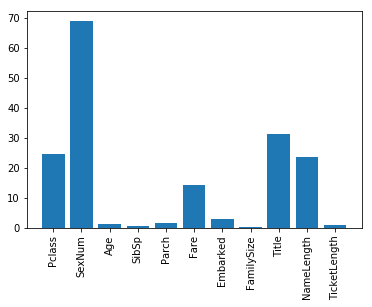

In [523]:
# from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

all_predictors = ["Pclass", "SexNum", "Age", "SibSp", "Parch", "Fare", 
                  "Embarked", "FamilySize", "Title", "NameLength", "TicketLength"]

selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[all_predictors], titanic["Survived"])
scores = -np.log10(selector.pvalues_)
plt.bar(range(len(all_predictors)), scores)
plt.xticks(range(len(all_predictors)), all_predictors, rotation='vertical')
plt.show()

predictors = ["Pclass", "SexNum", "Fare", "Embarked", "Title", "NameLength"]

In [525]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
tree_param_grid = {'min_samples_split': list((2,3,6,9)),'n_estimators':list((10,50,100,300)), "min_samples_leaf":list((2,3,6,9))}
grid = GridSearchCV(RandomForestClassifier(),param_grid=tree_param_grid, cv=5)
grid.fit(titanic[predictors], titanic["Survived"])
grid.grid_scores_, grid.best_params_, grid.best_score_

([mean: 0.79574, std: 0.02175, params: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10},
  mean: 0.80808, std: 0.02338, params: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50},
  mean: 0.80696, std: 0.02738, params: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100},
  mean: 0.81481, std: 0.02190, params: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300},
  mean: 0.80022, std: 0.01872, params: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10},
  mean: 0.80584, std: 0.02464, params: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50},
  mean: 0.80696, std: 0.02829, params: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100},
  mean: 0.80584, std: 0.02708, params: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300},
  mean: 0.81257, std: 0.02878, params: {'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 10},
  mean: 0.81145, std: 0.

In [526]:
alg = RandomForestClassifier(random_state=13, n_estimators=300, min_samples_split=2, min_samples_leaf=2)
kf = cross_validation.KFold(titanic.shape[0], n_folds=5, random_state=13)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)
print(scores.mean())

0.8047329106772958


### Decision tree

In [520]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 2)
print(dtr)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


## Prediction

In [516]:
alg.fit(titanic[predictors], titanic["Survived"])
print(alg)
res = alg.predict(titanic_test[predictors])
res[1:5]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


array([0, 1, 0, 0])

In [517]:
res[res > 0.5] = 1
res[res <= 0.5] = 0
# print(res)
# print(type(res))  # <class 'numpy.ndarray'>

# res = np.array([res]).T
# print(res.shape)
res[1:5]

array([0, 1, 0, 0])

## output

In [518]:
passenger_id = np.array(range(titanic.shape[0] + 1, titanic.shape[0] + 1 + titanic_test.shape[0]))

np.savetxt("result1.csv", 
           np.column_stack((passenger_id, res)),
           delimiter=",", 
           fmt="%u, %u",
           header="PassengerId,Survived", comments="")